# Loading the data

In [28]:
import numpy
import pandas
import json

In [32]:
# Load the data from file, make it into a pretty pandas Dataframe
data = pandas.read_json('samples/target.json').T
data['name'] = data.index
data.reset_index(inplace=True, drop=True) # reset index to numbers, drop extra index column
data.head()

,class,name
0,NIGHT,snapshot-2017-07-22_20-20-01.jpg
1,NIGHT,snapshot-2017-07-22_20-30-01.jpg
2,NIGHT,snapshot-2017-07-22_20-40-01.jpg
3,NIGHT,snapshot-2017-07-22_20-50-01.jpg
4,NIGHT,snapshot-2017-07-22_21-00-01.jpg


In [33]:
# Getting an idea of how the data is distributed
data['class'].value_counts()

NIGHT    435
WET      280
DRY       67
Name: class, dtype: int64

# Apply the predictor

In [34]:
from roofcam.classifier import classify_wet_or_dry
data['prediction'] = data.apply(lambda row: classify_wet_or_dry("samples/" + row['name']), axis=1)
data.head()

,class,name,prediction
0,NIGHT,snapshot-2017-07-22_20-20-01.jpg,NIGHT
1,NIGHT,snapshot-2017-07-22_20-30-01.jpg,NIGHT
2,NIGHT,snapshot-2017-07-22_20-40-01.jpg,NIGHT
3,NIGHT,snapshot-2017-07-22_20-50-01.jpg,WET
4,NIGHT,snapshot-2017-07-22_21-00-01.jpg,WET


In [35]:
data['prediction'].value_counts()

WET      405
NIGHT    341
DRY       26
ERROR     10
Name: prediction, dtype: int64

# Analyzing the Results

In [84]:
# Drop error rows, we're not that interested in them (errors are caused by faulty images)
data = data[data['prediction'] != "ERROR"]

# Drop NIGHT rows
# data = data[data['prediction'] != "NIGHT"]
# data = data[data['class'] != "NIGHT"]

In [85]:
correct = len(data[data['prediction'] == data['class']])
correct_percent = float(correct)/len(data) * 100
print "TOTAL", len(data)
print "CORRECT", correct, "({0:0.0f}%)".format(correct_percent)
print "INCORRECT", len(data) - correct, "({0:0.0f}%)".format(100 - correct_percent)

TOTAL 315
CORRECT 282 (90%)
INCORRECT 33 (10%)


## Confusion Matrix (predicted class vs. actual class)

In [86]:
from pandas_ml import ConfusionMatrix

y_true=data['class']
y_pred=data['prediction']
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  DRY  WET  __all__
Actual                      
DRY         26   33       59
WET          0  256      256
__all__     26  289      315


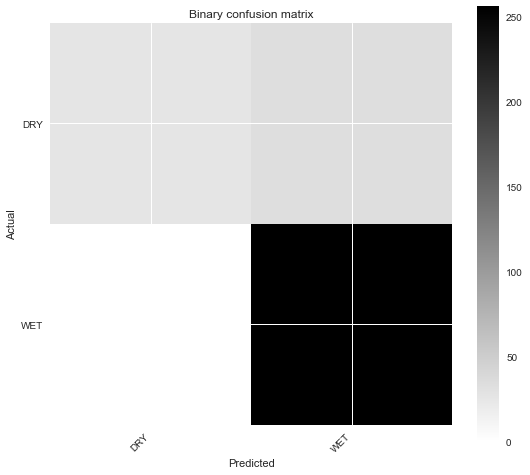

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

confusion_matrix.plot()